### Background:

ACME is one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges.

At ACME we thrive for making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.


### Data Description:

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers

X1 = my order was delivered on time

X2 = contents of my order was as I expected

X3 = I ordered everything I wanted to order

X4 = I paid a good price for my order

X5 = I am satisfied with my courier

X6 = the app makes ordering easy for me

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.


### Download Data
[Here](https://drive.google.com/file/d/1KWE3J0uU_sFIJnZ74Id3FDBcejELI7FD/view)

### Goal(s):

- Predict if a customer is happy or not based on the answers they give to questions asked.

### Success Metrics:

Reach 73% accuracy score or above, or convince us why your solution is superior. We are definitely interested in every solution and insight you can provide us.



### Bonus(es):

We are very interested in finding which questions/features are more important when predicting a customer’s happiness. Using a feature selection approach show us understand what is the minimal set of attributes/features that would preserve the most information about the problem while increasing predictability of the data we have. Is there any question that we can remove in our next survey?



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer_data = pd.read_csv('ACME-HappinessSurvey2020.csv')
customer_data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [3]:
customer_data.shape

(126, 7)

In [4]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [5]:
customer_data.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
# checking for duplicate data
customer_data.duplicated().sum()

16

The customer feedback dataset contains 127 data points and 7 features. All the features are integers with values ranging from 1 to 5 except the target variable which either 0 or 1. The statistical features of the data describes that the variable X1 (my order was delivered on time) and X6 (the app makes ordering easy for me) has higher average, indicating greater satisfaction of customer on the timely delivery and easy operation of the app. The variable X2 (contents of my order was as I expected) has lowest average indicating the less customer satisfaction on the product delivered. 

### Exploratory Data Analysis

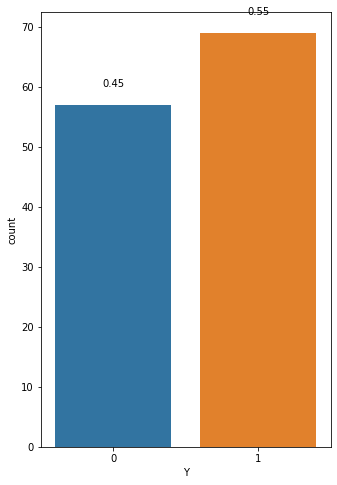

In [7]:
# customer feedback (happy/unhappy customer) distribution
plt.figure(figsize=(8, 8))
ax = sns.countplot(x="Y", data= customer_data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/float(len(customer_data))),
            ha="center")
    ax.set_box_aspect(3/len(ax.patches))

__In this data 45% of the customers are unhappy with the service.__

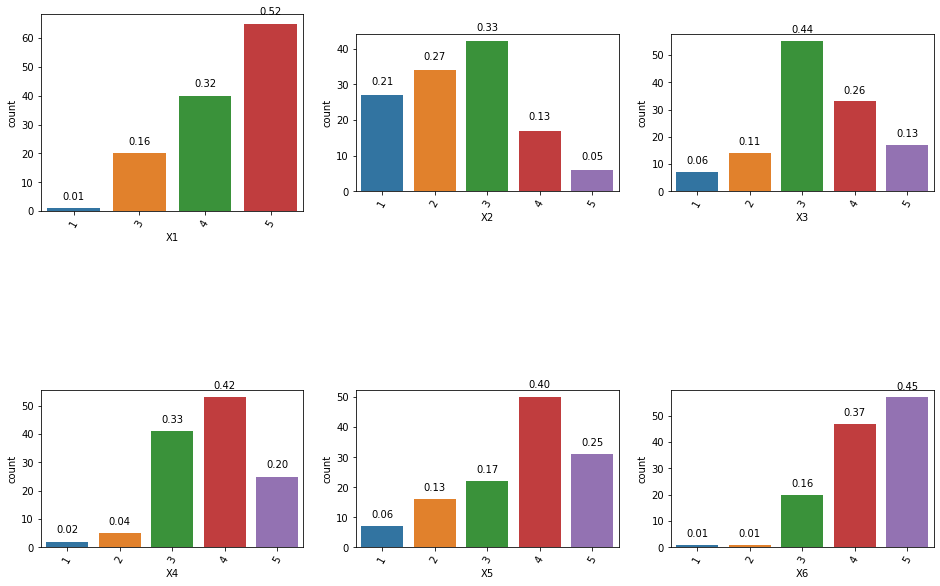

In [8]:
# Distribution of other variables
fig, axes =plt.subplots(2,3, figsize=(16, 12))

ax = sns.countplot(x="X1", data= customer_data, ax=axes[0,0])
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/float(len(customer_data))),
            ha="center")
    ax.set_box_aspect(3/len(ax.patches))
ax = sns.countplot(x="X2", data= customer_data, ax=axes[0,1])
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/float(len(customer_data))),
            ha="center")
    ax.set_box_aspect(3/len(ax.patches))

ax = sns.countplot(x="X3", data= customer_data, ax=axes[0,2])
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/float(len(customer_data))),
            ha="center")
    ax.set_box_aspect(3/len(ax.patches))

ax = sns.countplot(x="X4", data= customer_data, ax=axes[1,0])
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/float(len(customer_data))),
            ha="center")
    ax.set_box_aspect(3/len(ax.patches))

ax = sns.countplot(x="X5", data= customer_data, ax=axes[1,1])
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/float(len(customer_data))),
            ha="center")
    ax.set_box_aspect(3/len(ax.patches))

ax = sns.countplot(x="X6", data= customer_data, ax=axes[1,2])
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/float(len(customer_data))),
            ha="center")
    ax.set_box_aspect(3/len(ax.patches))

The feature X1 and X6 got highest number of 5 star ratings and the feature X2 got least number of 5 star ratings. Most of the customers are neutral about the feature X3 ( I ordered everything I wanted to order).

####  Correlation using Pearson Correlation

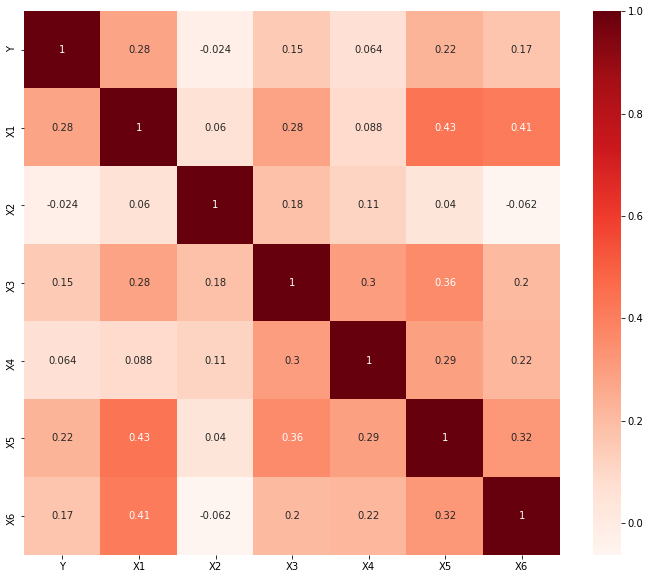

In [9]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = customer_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [10]:
#Correlation with output variable
cor_target = cor["Y"]
#Selecting highly positively correlated features
relevant_features = cor_target[cor_target>0.06]
relevant_features

Y     1.000000
X1    0.280160
X3    0.150838
X4    0.064415
X5    0.224522
X6    0.167669
Name: Y, dtype: float64

- Positively correlated parameters are: X1, X3, X4, X5 and X6
- Negatively correlated parameter: X2

### Modeling: Logistic Regression, Random Forest and XGBoost with ScikitLearn

In [11]:
# Import scikit-learn tools, grid search cross validation, and classifiers

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV,GridSearchCV
# import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# import Logistic Regression CV Classifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, roc_auc_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [12]:
#set predictor variables and target variables
X = customer_data.drop(columns= ['Y'])
y = customer_data.Y

In [13]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

# Show the results of the split
print("X Training set sample size:", (X_train.shape[0]))
print("X Testing set sample size:", (X_test.shape[0]))
print("y Training set sample size:", (y_train.shape[0]))
print("y Testing set sample size:", (y_test.shape[0]))

X Training set sample size: 88
X Testing set sample size: 38
y Training set sample size: 88
y Testing set sample size: 38


In [14]:
def model_evaluation(model,params,avg):
    
    pipe = make_pipeline(StandardScaler(),model)
    model_ran = RandomizedSearchCV(pipe,params,cv=10, n_jobs=-1, scoring = 'roc_auc',random_state = 42)
    model_ran = model_ran.fit(X_train,y_train)
    y_pred = model_ran.predict(X_test)
    y_pred_proba = model_ran.predict_proba(X_test)[:,1]
    f1 = f1_score(y_test, y_pred, average= avg)
    cm = confusion_matrix(y_test, y_pred)
    roc= roc_auc_score(y_test, y_pred_proba)
    print('F1-score: ' , round(f1,4))
    print("Best Score: " , round(model_ran.best_score_,4))
    print("Test ROC AUC:", round(roc,4), '\n')
    print("Best Parameters: " , model_ran.best_params_)
    print("Confusion Matrix: " ,'\n', cm, '\n')
    print("Classsification Report: ",'\n', classification_report(y_test, y_pred))
    y_pred_proba=model_ran.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr,tpr,label= 'f"{model}" ')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

### Binary Classification with Logistic Regression

F1-score:  0.55
Best Score:  0.5889
Test ROC AUC: 0.5736 

Best Parameters:  {'logisticregression__penalty': 'l2', 'logisticregression__C': 2.0}
Confusion Matrix:  
 [[ 9 11]
 [ 7 11]] 

Classsification Report:  
               precision    recall  f1-score   support

           0       0.56      0.45      0.50        20
           1       0.50      0.61      0.55        18

    accuracy                           0.53        38
   macro avg       0.53      0.53      0.53        38
weighted avg       0.53      0.53      0.52        38



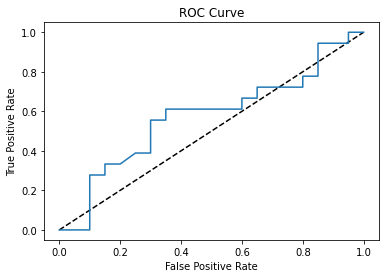

In [15]:
log_reg_params={'logisticregression__penalty': ['l1','l2','elasticnet'], 
                'logisticregression__C':np.arange(0.5, 100.0, 0.5) }
avg= 'binary'
log_reg2 = LogisticRegression()
model_evaluation(log_reg2,log_reg_params,avg)

### Random Forest Classifier

F1-score:  0.5909
Best Score:  0.605
Test ROC AUC: 0.6986 

Best Parameters:  {'randomforestclassifier__n_estimators': 600, 'randomforestclassifier__min_samples_split': 4, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 4, 'randomforestclassifier__criterion': 'entropy'}
Confusion Matrix:  
 [[ 7 13]
 [ 5 13]] 

Classsification Report:  
               precision    recall  f1-score   support

           0       0.58      0.35      0.44        20
           1       0.50      0.72      0.59        18

    accuracy                           0.53        38
   macro avg       0.54      0.54      0.51        38
weighted avg       0.54      0.53      0.51        38



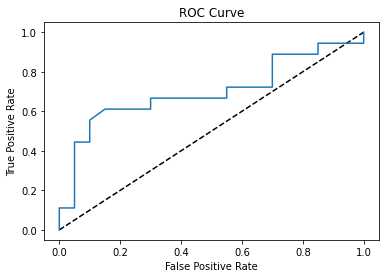

In [16]:
params= { 'randomforestclassifier__n_estimators': [500,600,800,1000,1500, 1800, 2000], 
             'randomforestclassifier__max_features': ['auto', 'sqrt', 'log2'], 
             'randomforestclassifier__max_depth' :  np.arange(4,20), 
             'randomforestclassifier__criterion' :['gini', 'entropy'],
            'randomforestclassifier__min_samples_split' : [2, 3, 4] }
avg= 'binary'

model_evaluation(RandomForestClassifier(), params, avg)

#### Feature importance 

In [22]:
# Instantiate and fit the random forest model. 
rf = RandomForestClassifier().fit(X_train, y_train) 
# Explore feature importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
# Print sorted list of feature importances
feature_importances

,importance
X2,0.186323
X1,0.174750
X4,0.171057
X3,0.170841
X5,0.158944
X6,0.138085


### XGBoost

In [19]:
import xgboost as xgb
from xgboost import XGBClassifier


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:26:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:26:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1-score:  0.6341
Best Score:  0.5322
Test ROC AUC: 0.6625 

Best Parameters:  {'xgbclassifier__subsample': 0.895, 'xgbclassifier__silent': 1, 'xgbclassifier__seed': 27, 'xgbclassifier__objective': 'binary:logistic', 'xgbclassifier__nthread': 10, 'xgbclassifier__n_estimators': 1000, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__max_depth': 2, 'xgbcla

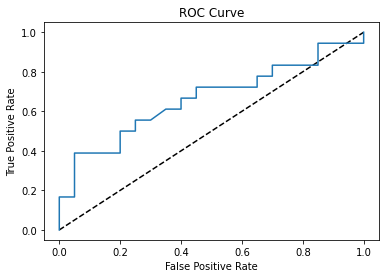

In [20]:
xg_params= {'xgbclassifier__nthread':[10], #when use hyperthread, xgboost may become slower
              'xgbclassifier__objective':['binary:logistic'],
              'xgbclassifier__learning_rate': [0.05], #so called `eta` value
              'xgbclassifier__max_depth': [2],
              'xgbclassifier__min_child_weight':[1] ,
              'xgbclassifier__silent': [1],
              'xgbclassifier__subsample': [.89,.91,.895],
              'xgbclassifier__colsample_bytree':[.58,.585],
              'xgbclassifier__n_estimators': [1000],
             'xgbclassifier__seed': [27]
            }            #number of trees, change it to 1000 for better results 
avg= 'binary'

xgb=XGBClassifier()

model_evaluation(XGBClassifier(), xg_params, avg)

In this problem I used supervised machine learning classification algorithms to predict if a customer is happy or not based on their feedback. I implemented and compared Logistic Regression, Random Forest classifier and XGBoost to classify the users in the test data as either happy or nothappy. Random Forest classifier with hyperparameter tuning performed best with ROC-AUC score of 0.70. The variables with highest importance values were the X2 (contents of my order was as I expected) and X1 (my order was delivered on time). So the customers were mostly unhappy with the products.